In [1]:
# DEMONSTRATE GRIDSEARCH WITH CASE14
# https://dwightreid.com/site/power-system-contingency-analysis-with-python-pandapower/


import pandas as pd
import pandapower as pp
import pandapower.networks as ppnets
#from pandapower.plotting import simple_plot, simple_plotly, pf_res_plotly
import pandapower.plotting as plt
import pandapower.plotting.plotly as pplotly
import matplotlib.pyplot as mplt

In [19]:
net =  ppnets.case14() 

In [20]:
net

This pandapower network includes the following parameter tables:
   - bus (14 elements)
   - load (11 elements)
   - gen (4 elements)
   - shunt (1 element)
   - ext_grid (1 element)
   - line (15 elements)
   - trafo (5 elements)
   - poly_cost (5 elements)
   - bus_geodata (14 elements)

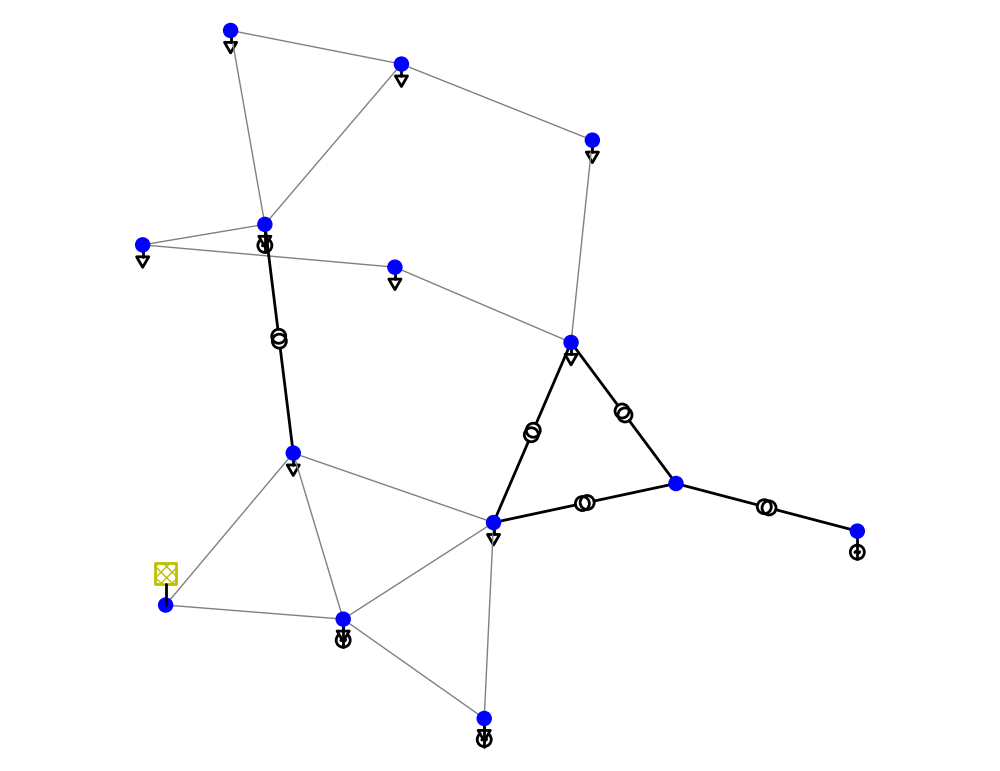

<Axes: >

In [21]:
plt.simple_plot(net,  plot_loads=True, plot_gens=True)

In [22]:
# disconnect from external grid - create an island
net.ext_grid['in_service']=False

In [23]:
#pp.runopp(net, delta=1e-8)

In [24]:
#net.load[['bus','p_mw','q_mvar']]

In [25]:
net.gen

,name,bus,p_mw,vm_pu,sn_mva,min_q_mvar,max_q_mvar,scaling,slack,in_service,slack_weight,type,controllable,max_p_mw,min_p_mw
0,None,1,40.0,1.045,NaN,-40.0,50.0,1.0,False,True,0.0,None,True,140.0,0.0
1,None,2,0.0,1.010,NaN,0.0,40.0,1.0,False,True,0.0,None,True,100.0,0.0
2,None,5,0.0,1.070,NaN,-6.0,24.0,1.0,False,True,0.0,None,True,100.0,0.0
3,None,7,0.0,1.090,NaN,-6.0,24.0,1.0,False,True,0.0,None,True,100.0,0.0


In [26]:
net.gen['vm_pu']=1.045

In [27]:
# Perform a simple generator dispatch by maxing out the first three generators and setting the fourth one as the slack.
net.gen.loc[0,'p_mw'] = 140 
net.gen.loc[1,'p_mw'] = 100 
net.gen.loc[2,'p_mw'] = 100
net.gen.loc[3,'slack'] = True 

In [28]:
net.gen[['bus','p_mw','vm_pu']]

,bus,p_mw,vm_pu
0,1,140.0,1.045
1,2,100.0,1.045
2,5,100.0,1.045
3,7,0.0,1.045


In [29]:
net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type,controllable
0,None,1,21.7,12.7,0.0,0.0,NaN,1.0,True,None,False
1,None,2,94.2,19.0,0.0,0.0,NaN,1.0,True,None,False
2,None,3,47.8,-3.9,0.0,0.0,NaN,1.0,True,None,False
3,None,4,7.6,1.6,0.0,0.0,NaN,1.0,True,None,False
4,None,5,11.2,7.5,0.0,0.0,NaN,1.0,True,None,False
5,None,8,29.5,16.6,0.0,0.0,NaN,1.0,True,None,False
6,None,9,9.0,5.8,0.0,0.0,NaN,1.0,True,None,False
7,None,10,3.5,1.8,0.0,0.0,NaN,1.0,True,None,False
8,None,11,6.1,1.6,0.0,0.0,NaN,1.0,True,None,False
9,None,12,13.5,5.8,0.0,0.0,NaN,1.0,True,None,False


In [30]:
pp.runpp(net,numba=False)

In [32]:
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.040134,17.204662,0.000000,0.000000
1,1.045000,17.807919,-118.300000,-4.990003
2,1.045000,15.616964,-5.800000,-14.365044
3,1.008926,13.679667,47.800000,-3.900000
4,1.014580,15.004135,7.600000,1.600000
5,1.045000,16.407703,-88.800000,10.929587
6,1.019019,7.040958,0.000000,0.000000
7,1.045000,0.000000,74.102238,-19.972079
8,1.004872,8.025036,29.500000,-2.585581
9,1.001280,9.218494,9.000000,5.800000


In [14]:
# Real power: gen ?= load + shunt(consumption) + xward + losses + export
#P_rhs = P_load + max(P_shunt, 0.0) + P_xward + P_loss + P_export
#Q_rhs = Q_load + Q_loss + Q_shunt + Q_xward + Q_export

# the basic way
print('P_load = ' ,net.res_load['p_mw'].sum())
print('P_gen = ' ,net.res_gen['p_mw'].sum()+net.res_sgen['p_mw'].sum()+net.res_ext_grid['p_mw'].sum())
print('P_shunt = ',net.res_shunt['p_mw'].sum())
print('P_loss = ',net.res_line['pl_mw'].sum()+net.res_trafo['pl_mw'].sum())
print('***************************')
print('Q_load = ' ,net.res_load['q_mvar'].sum())
print('Q_gen = ' ,net.res_gen['q_mvar'].sum()+net.res_sgen['q_mvar'].sum()+net.res_ext_grid['q_mvar'].sum())
print('Q_shunt = ',net.res_shunt['q_mvar'].sum())
print('Q_loss = ',net.res_line['ql_mvar'].sum()+net.res_trafo['ql_mvar'].sum())

P_load =  259.0
P_gen =  265.89776200123043
P_shunt =  0.0
P_loss =  6.8977620322135085
***************************
Q_load =  73.5
Q_gen =  67.59753784629007
Q_shunt =  -19.185580553825712
Q_loss =  13.283118503284038


In [15]:
net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type,controllable
0,None,1,21.7,12.7,0.0,0.0,NaN,1.0,True,None,False
1,None,2,94.2,19.0,0.0,0.0,NaN,1.0,True,None,False
2,None,3,47.8,-3.9,0.0,0.0,NaN,1.0,True,None,False
3,None,4,7.6,1.6,0.0,0.0,NaN,1.0,True,None,False
4,None,5,11.2,7.5,0.0,0.0,NaN,1.0,True,None,False
5,None,8,29.5,16.6,0.0,0.0,NaN,1.0,True,None,False
6,None,9,9.0,5.8,0.0,0.0,NaN,1.0,True,None,False
7,None,10,3.5,1.8,0.0,0.0,NaN,1.0,True,None,False
8,None,11,6.1,1.6,0.0,0.0,NaN,1.0,True,None,False
9,None,12,13.5,5.8,0.0,0.0,NaN,1.0,True,None,False


In [16]:
# super basic contingency analysis

lines = net.line.index

# count violations high voltage, low voltage, overloading
c_hv=[]
c_lv=[]
c_ov=[]

vmax = 1.05
vmin = 0.95
line_loading_max = 0.9
s=[1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9] # scale up the load
for q in range(len(s)):
    print(s[q])
    critical_lines = []
    critical_lines_indx = []
    net.load.scaling = s[q]  
    for l in lines:
        net.line.loc[l, 'in_service'] = False
        pp.runpp(net, numba=False, max_iteration=100)
        if net.res_bus.vm_pu.max()>vmax:
            critical_lines.append([l, 'hv'])
            critical_lines_indx.append(l)
        if net.res_bus.vm_pu.min() < vmin:
            critical_lines.append([l, 'lv'])
            critical_lines_indx.append(l)
        if net.res_line.loading_percent.max() > line_loading_max:
            critical_lines.append([l, 'ol'])
            critical_lines_indx.append(l)
        net.line.loc[l, 'in_service'] = True
    #print(critical_lines)
    df = pd.DataFrame(critical_lines, columns=['index', 'type'])
    c_hv.append(df[df['type'] == 'hv'].shape[0])
    c_lv.append(df[df['type'] == 'lv'].shape[0])
    c_ov.append(df[df['type'] == 'ol'].shape[0])


result=pd.DataFrame(zip(s,c_lv,c_hv,c_ov), columns=['load scaling','low voltage','high voltage','overloading'])
result

1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
1.9


,load scaling,low voltage,high voltage,overloading
0,1.0,1,0,0
1,1.1,1,0,0
2,1.2,1,0,0
3,1.3,2,0,0
4,1.4,2,0,0
5,1.5,3,0,0
6,1.6,3,0,0
7,1.7,3,0,0
8,1.8,4,0,0
9,1.9,6,0,1


In [18]:
# super basic contingency analysis
net.load.scaling = 1.0  
added_load=10.0

lines = net.line.index

c_hv=[]
c_lv=[]
c_ov=[]

vmax = 1.05
vmin = 0.95
line_loading_max = 1.0
q=[0,1,2,3,4,5,6,7,8,9,10]   #load buses
for q in range(len(q)):
    print(q)
    critical_lines = []
    critical_lines_indx = [] 
    net.load.loc[q,'p_mw'] = net.load.loc[q,'p_mw']+added_load 
    for l in lines:
        net.line.loc[l, 'in_service'] = False
        pp.runpp(net, numba=False, max_iteration=100)
        if net.res_bus.vm_pu.max()>vmax:
            critical_lines.append([l, 'hv'])
            critical_lines_indx.append(l)
        if net.res_bus.vm_pu.min() < vmin:
            critical_lines.append([l, 'lv'])
            critical_lines_indx.append(l)
        if net.res_line.loading_percent.max() > line_loading_max:
            critical_lines.append([l, 'ol'])
            critical_lines_indx.append(l)
        net.line.loc[l, 'in_service'] = True
    print(critical_lines)
    df = pd.DataFrame(critical_lines, columns=['index', 'type'])
    c_hv.append(df[df['type'] == 'hv'].shape[0])
    c_lv.append(df[df['type'] == 'lv'].shape[0])
    c_ov.append(df[df['type'] == 'ol'].shape[0])
#    print(net.load)
    net.load.loc[q,'p_mw'] = net.load.loc[q,'p_mw']-added_load 

#result=pd.DataFrame(zip(s,c_lv,c_hv,c_ov), columns=['load bus','low voltage','high voltage','overloading'])
#result

0
[[9, 'lv']]
1
[[9, 'lv']]
2
[[9, 'lv']]
3
[[9, 'lv']]
4
[[9, 'lv']]
5
[[9, 'lv']]
6
[[9, 'lv']]
7
[[9, 'lv']]
8
[[9, 'lv']]
9
[[9, 'lv']]
10
[[9, 'lv'], [11, 'lv'], [14, 'lv']]


In [ ]:
net.res_

In [ ]:
[c_lv]

#result=pd.DataFrame(s,c_lv, columns=['load scaling','low voltage'])
#result

In [ ]:
result=pd.DataFrame(zip(s,c_lv,c_hv,c_ov), columns=['load scaling','low voltage','high voltage','overlading'])
result

In [ ]:
df = pd.DataFrame(critical_lines, columns=['index', 'type'])
df['type']=='hv'
c_hv = df[df['type'] == 'hv'].shape[0]
c_lv = df[df['type'] == 'lv'].shape[0]
c_ol = df[df['type'] == 'ol'].shape[0]

print(c_hv,c_lv,c_ol)


In [ ]:
net.res_line

In [ ]:
critical_lines

In [ ]:
fig, ax = mplt.subplots()
fig.set_figheight(6)
fig.set_figwidth(8)

critical_lc = plt.create_line_collection(net, critical_lines_indx, color="r", zorder=2) #create lines

plt.draw_collections([critical_lc], ax=ax);
plt.simple_plot(net,  plot_loads=True, plot_gens=True,  ax=ax, show_plot=False);

mplt.show()

In [ ]:
net.res_load

In [ ]:
21.7*1.4